### Business Context:
    -The client is one of the leading online market place in India and would like partner with Analytixlabs. 
    -Client wants help in measuring, managing and analysing performance of business

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as stats
import re
import seaborn as sns

In [2]:
%cd "D:\AnalytixLab Study_Content\Python_classe_files\Case Studies\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project"

D:\AnalytixLab Study_Content\Python_classe_files\Case Studies\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project


In [3]:
customer= pd.read_csv('CUSTOMERS.CSV')
geo_loc= pd.read_csv("GEO_LOCATION.CSV")
ord_item= pd.read_csv("ORDER_ITEMS.csv")
ord_pay= pd.read_csv("ORDER_PAYMENTS.CSV")
review= pd.read_csv("ORDER_REVIEW_RATINGS.csv")
order= pd.read_csv("ORDERS.csv")
product= pd.read_csv("PRODUCTS.csv")
seller= pd.read_csv("SELLERS.csv")

In [4]:
customer.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh


In [5]:
geo_loc.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh


In [6]:
ord_item.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29


In [7]:
ord_pay.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [8]:
review.head(1)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46


In [9]:
order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00


In [10]:
product.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [11]:
seller.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh


In [57]:
customer_geo= pd.merge(customer,geo_loc,left_on= 'customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how= 'left')

In [58]:
customer_geo_order= pd.merge(customer_geo,order, left_on='customer_id', right_on='customer_id', how= 'left')

In [59]:
customer_geo_order_review= pd.merge(customer_geo_order,review, left_on='order_id',right_on='order_id', how= 'left' )

In [60]:
customer_geo_order_review_ordpay = pd.merge(customer_geo_order_review, ord_pay, left_on='order_id', right_on='order_id', how= 'left')

In [61]:
customer_geo_order_review_ordpay_orditem= pd.merge(customer_geo_order_review_ordpay, ord_item,left_on='order_id',right_on='order_id', how='left')

In [62]:
customer_geo_order_review_ordpay_orditem_seller= pd.merge(customer_geo_order_review_ordpay_orditem, seller, left_on='seller_id',right_on='seller_id', how= 'left')

In [63]:
final_data= customer_geo_order_review_ordpay_orditem_seller.merge(product,left_on='product_id',right_on='product_id', how= 'left')

In [64]:
final_data.shape

(119151, 42)

In [65]:
final_data.drop(columns=['product_weight_g','product_photos_qty','product_name_lenght','product_description_lenght','product_width_cm','geolocation_lat','geolocation_lng'],axis=1, inplace=True)

# 1. Perform Detailed exploratory analysis


# a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [66]:
pd.set_option('display.max.column',50)

In [67]:
final_data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_length_cm,product_height_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,14409.0,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,88b8b52d46df026a9d1ad2136a59b30b,4,5/26/2017 0:00,5/30/2017 22:34,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,8577.0,Vijayawada,Andhra Pradesh,Office_Furniture,54.0,64.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,9790.0,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,1/30/2018 0:00,2/10/2018 22:43,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,88303.0,Sadasivpet,Andhra Pradesh,Housewares,89.0,15.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,1151.0,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,5ad6695d76ee186dc473c42706984d87,5,6/15/2018 0:00,6/15/2018 12:10,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,8577.0,Vijayawada,Andhra Pradesh,Office_Furniture,52.0,52.0


In [19]:
# TOTAL REVENUE

In [68]:
final_data['revenue']=final_data['price']+final_data['freight_value']

In [69]:
final_data['revenue'].sum()

16645176.909999998

In [22]:
# TOTAL QUANTITY

In [23]:
final_data['order_item_id'].count()

118318

In [24]:
# TOTAL PRODUCTS

In [25]:
final_data['product_id'].nunique()

32951

In [26]:
# TOTAL CATEGORIES

In [27]:
final_data['product_category_name'].nunique()

71

In [28]:
# Total sellers

In [29]:
final_data['seller_id'].nunique()

3095

In [30]:
# Total locations

In [31]:
final_data['geolocation_zip_code_prefix'].nunique()

14837

In [32]:
# Total channels

In [50]:
final_data['order_status'].nunique()

8

In [34]:
# TOTAL PAYMENT MODE

In [35]:
final_data['payment_type'].nunique()

5

# b. Understanding how many new customers acquired every month

In [71]:
final_data['order_purchase_timestamp']= pd.to_datetime(final_data['order_purchase_timestamp'], format="%m/%d/%Y %H:%M")

In [72]:
# Changing the timestamp into year and month as per requirement

final_data['year_order']= final_data['order_purchase_timestamp'].dt.year 
final_data['month_order']= final_data['order_purchase_timestamp'].dt.month

In [73]:
final_data[['year_order', 'month_order','customer_id']].groupby(['year_order', 'month_order'])['customer_id'].count().reset_index().head(3)

,year_order,month_order,customer_id
0,2016,9,7
1,2016,10,402
2,2016,12,1


In [81]:
#pd.DataFrame(final_data.groupby('month_order')['customer_id'].apply(set) - final_data.groupby('month_order')['customer_id'].unique().apply(set).shift())

<Axes: xlabel='month_order'>

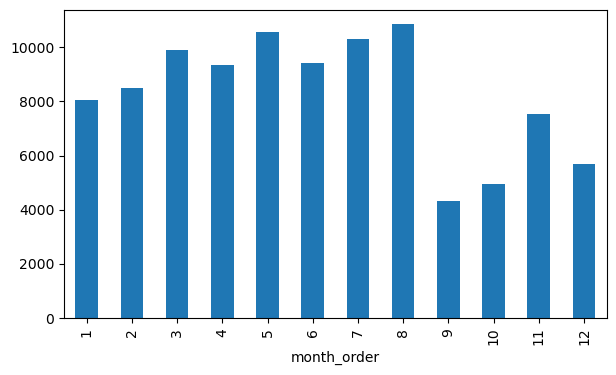

In [82]:
a =final_data.groupby('month_order')['customer_id'].nunique()

plt.figure(figsize= (7,4))
a.plot(kind= 'bar')

# c. Understand the retention of customers on month on month basis

In [39]:
#data_reten= final_data[final_data['customer_id'].duplicated()]

In [40]:
#count_reten= data_reten.groupby(['year_order','month_order'])['customer_id'].count().reset_index()

In [45]:
#count_reten.head()

In [52]:
uni_cust= final_data['customer_id'].unique()
active_cust = final_data.groupby('month_order')['customer_id'].nunique()

cust_reten = active_cust/len(uni_cust)

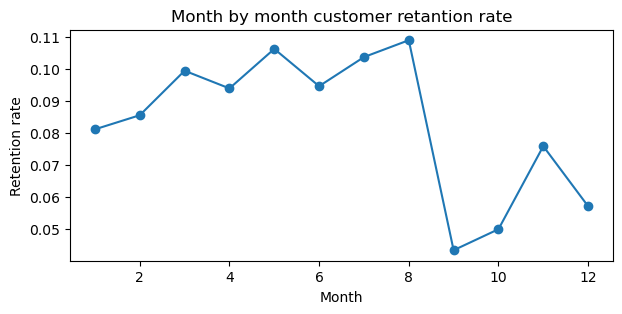

In [53]:
plt.figure(figsize=(7,3))
plt.plot(cust_reten.index, cust_reten.values,marker='o')
plt.title('Month by month customer retantion rate')
plt.ylabel("Retention rate")
plt.xlabel('Month')
plt.show()

In [42]:
# for reshape the data by pivot table.
#count_reten.pivot_table(values='customer_id', index= 'month_order',columns='year_order')

# d. How the revenues from existing/new customers on month on month basis

In [48]:
existing_cust= final_data[final_data['customer_id'].duplicated()]
new_cust= final_data[-final_data['customer_id'].duplicated()]


In [44]:
existing_cust.groupby(['month_order','year_order'])['revenue'].sum().reset_index().head()

,month_order,year_order,revenue
0,1,2017,24948.06
1,1,2018,151814.91
2,2,2017,39366.64
3,2,2018,143652.01
4,3,2017,62006.33


In [45]:
new_cust.groupby(['month_order','year_order'])['revenue'].sum().reset_index().head()

,month_order,year_order,revenue
0,1,2017,123082.05
1,1,2018,1006927.93
2,2,2017,264281.67
3,2,2018,895666.29
4,3,2017,397772.31


# e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [104]:
final_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix',
       'geolocation_city', 'geolocation_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_length_cm',
       'product_height_cm', 'revenue', 'year_order', 'month_order'],
      dtype='object')

In [47]:
final_data['week']= final_data['order_purchase_timestamp'].dt.isocalendar().week

In [48]:
final_data['weekday']= final_data['order_purchase_timestamp'].dt.weekday+1

In [49]:
final_data['hour']= final_data['order_purchase_timestamp'].dt.hour

In [50]:
da = ['product_category_name' ,'geolocation_state', 'month_order', 'year_order','weekday','week','time', 'payment_type','order_status']
da

['product_category_name',
 'geolocation_state',
 'month_order',
 'year_order',
 'weekday',
 'week',
 'time',
 'payment_type',
 'order_status']

In [51]:
def bar_chart(arg):
    m = final_data.groupby(arg).agg({'revenue': 'sum', 'order_item_id': 'count'}).reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.bar(m[arg], m['revenue'], color='blue')
    plt.xlabel(arg)
    plt.ylabel('Revenue')
    plt.title(f'Bar Chart for {arg}')
    plt.grid(True)
    plt.xticks(rotation=90, ha='right')    
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()


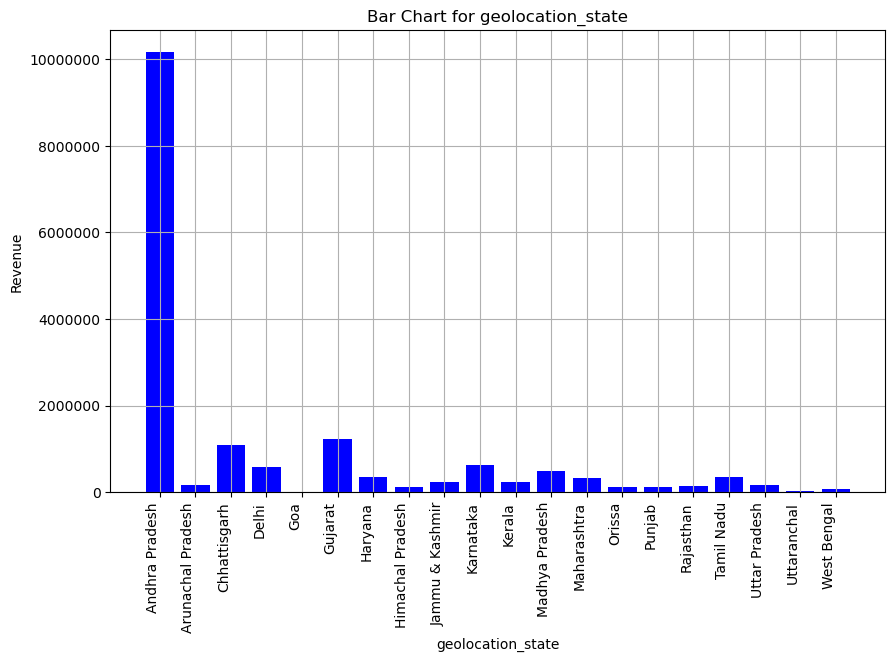

In [52]:
# Revenue base
bar_chart('geolocation_state')

In [53]:
def bar_chart(arg):
    m = final_data.groupby(arg).agg({'revenue': 'sum', 'order_item_id': 'count'}).reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.bar(m[arg], m['revenue'], color='blue')
    plt.xlabel(arg)
    plt.ylabel('quantity')
    plt.title(f'Bar Chart for {arg}')
    plt.grid(True)
    plt.xticks(rotation=90, ha='right')    
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()


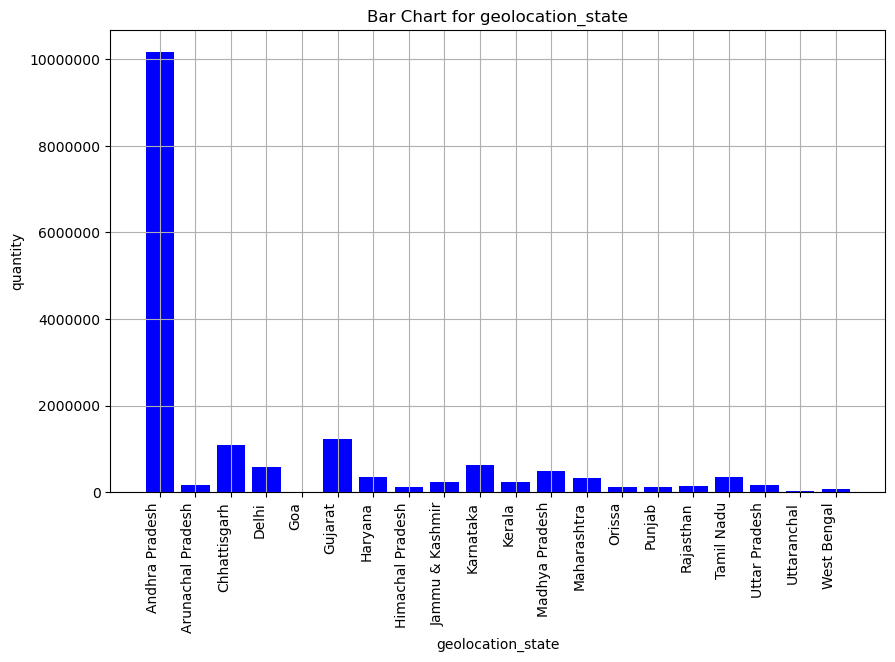

In [54]:
# Quantity base
bar_chart('geolocation_state')

# f. Popular Products by month, seller, state, category

In [118]:
final_data.groupby(['product_id','month_order'])['order_item_id'].count().nlargest(5).reset_index()

,product_id,month_order,order_item_id
0,aca2eb7d00ea1a7b8ebd4e68314663af,1,124
1,53b36df67ebb7c41585e8d54d6772e08,5,115
2,422879e10f46682990de24d770e7f83d,11,97
3,99a4788cb24856965c36a24e339b6058,5,93
4,aca2eb7d00ea1a7b8ebd4e68314663af,5,92


In [119]:
sorted_items = final_data.groupby([ 'year_order','month_order', 'product_id'])['order_item_id'].count().reset_index().sort_values(by=['year_order', 'month_order', 'order_item_id'], ascending=[True, True, False])
top1_popular_item = sorted_items.groupby(['year_order','month_order']).head(1)
#top1_popular_item.head()

In [56]:
# seller wise popular products

seller_wise = final_data.groupby(['seller_id','product_id'])['order_item_id'].count().reset_index().sort_values(by='order_item_id', ascending=False)
seller_wise

,seller_id,product_id,order_item_id
21025,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,536
9881,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,522
4645,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,508
4643,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,406
4642,1f50f920176fa81dab994f9023523100,368c6c730842d78016ad823897a372db,398
...,...,...,...
15008,70126eecc6aa1274392a1743866e9678,3a96bcbf644a5d390107570628568026,1
15006,70125af26c2d6d4ef401a1d02ae7701f,4ce99ff9dcb7821acd8e599d5d4a6531,1
15002,700f03c207639c22d933381ff60b35c2,527921e5d38d82e839ef2195d6455fc6,1
14999,7008613ea464bad5cb9b83456e1e6a8f,e7f5908a3c9844728d24e3322254b109,1


In [57]:
# location wise popular products


location_wise = final_data.groupby(['geolocation_state','product_id'])['order_item_id'].count().reset_index().sort_values(by='order_item_id', ascending=False)
location_wise.groupby('geolocation_state').head(1)

,geolocation_state,product_id,order_item_id
16682,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,354
36044,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,52
26854,Chhattisgarh,422879e10f46682990de24d770e7f83d,40
47406,Madhya Pradesh,d1c427060a0f73f6b889a5c7c61f2ac4,24
30977,Delhi,53759a2ecddad2bb87a079a1f1519f73,24
42171,Karnataka,422879e10f46682990de24d770e7f83d,23
38136,Haryana,35afc973633aaeb6b877ff57b2793310,17
52373,Tamil Nadu,a9516a079e37a9c9c36b9b78b10169e8,16
40852,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
48785,Maharashtra,99a4788cb24856965c36a24e339b6058,13


In [58]:
# category wise popular products


category_wise = final_data.groupby(['product_category_name','product_id'])['order_item_id'].count().reset_index().sort_values(by='order_item_id', ascending=False)
category_wise.groupby('product_category_name').head(1)

,product_category_name,product_id,order_item_id
14154,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,536
5002,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,528
15387,Garden_Tools,422879e10f46682990de24d770e7f83d,508
7999,Computers_Accessories,d1c427060a0f73f6b889a5c7c61f2ac4,357
31448,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,327
...,...,...,...
11935,Fashion_Sport,e8f7d2639ff8caa8b86e5973295898b7,5
22142,Music,2848023ffcfb063bb7aa0d0c447bd116,4
11650,Fashion_Childrens_Clothes,57bdf3098169cccdb62221bd3e089cbd,3
21673,La_Cuisine,33900d427fa4bd3f509cdacda72e84a3,3


# g. Popular categories by state, month


In [59]:
final_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'revenue',
       'year_or

In [110]:
popular_cat= final_data.groupby(['month_order','product_category_name','customer_state'])['order_item_id'].count().reset_index().sort_values(by= ['order_item_id','customer_state','month_order'], ascending=[False,True,True])

popular_cat.groupby(['customer_state', 'month_order']).head()

,month_order,product_category_name,customer_state,order_item_id
4450,8,Bed_Bath_Table,Andhra Pradesh,857
3787,7,Bed_Bath_Table,Andhra Pradesh,815
4742,8,Health_Beauty,Andhra Pradesh,804
2523,5,Bed_Bath_Table,Andhra Pradesh,803
3160,6,Bed_Bath_Table,Andhra Pradesh,796
...,...,...,...,...
6270,11,Furniture_Decor,Uttaranchal,1
6606,12,Baby,Uttaranchal,1
6757,12,Fashion_Bags_Accessories,Uttaranchal,1
7042,12,Toys,Uttaranchal,1


# h. List top 10 most expensive products sorted by price

In [61]:
final_data[['product_id','price']].sort_values(by= 'price', ascending=False).head(10)

,product_id,price
16177,489ae2aa008f021502940f251d4cce7f,6735.00
25418,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
4700,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
32766,a6492cc69376c469ab6f61d8f44de961,4799.00
14462,c3ed642d592594bb648ff4a04cee2747,4690.00
48803,259037a6a41845e455183f89c5035f18,4590.00
77294,a1beef8f3992dbd4cd8726796aa69c53,4399.87
7094,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
108144,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
100520,6902c1962dd19d540807d0ab8fade5c6,3999.90


# 2. Performing Customers/sellers Segmentation

#    a. Divide the customers into groups based on the revenue generated 

In [192]:
# On customer Behalf

#divide_cust= pd.cut(x= final_data['customer_city'],bins=4,labels=['low','medium','high','top'])
#divide_cust.value_counts()


In [113]:
cust_rev= final_data.groupby('customer_unique_id')['revenue'].sum().reset_index(name= 'Total_revenue')
cust_rev.head(3)

,customer_unique_id,Total_revenue
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22


In [122]:
percentile = [0,0.2,0.5,0.75,1]
labels = ['silver','gold','platinum','Diamond']

cust_rev['cus_segment']= pd.qcut(x= cust_rev['Total_revenue'], q=percentile, labels= labels)
cust_rev.head()

,customer_unique_id,Total_revenue,cus_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,platinum
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,silver
2,0000f46a3911fa3c0805444483337064,86.22,gold
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,silver
4,0004aac84e0df4da2b147fca70cf8255,196.89,Diamond


# b. Divide the sellers into groups based on the revenue generated 

In [124]:
sell_rev= final_data.groupby('seller_id')['revenue'].sum().reset_index(name = 'total_rev')
sell_rev.head(3)

,seller_id,total_rev
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,34175.38
2,001e6ad469a905060d959994f1b41e4f,267.94


In [128]:
percentile= [0, 0.25, 0.5,0.75,1]
labels = ['low_sell','avg_sell', 'better','top']
sell_rev['seller_segment']= pd.qcut(x= sell_rev['total_rev'],q= percentile, labels=labels)

sell_rev.head()

,seller_id,total_rev,seller_segment
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,better
1,001cca7ae9ae17fb1caed9dfb1094831,34175.38,top
2,001e6ad469a905060d959994f1b41e4f,267.94,low_sell
3,002100f778ceb8431b7a1020ff7ab48f,2141.41,better
4,003554e2dce176b5555353e4f3555ac8,139.38,low_sell


# 3. Cross-Selling (Which products are selling together)    Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)


In [64]:
final_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'revenue',
       'year_or

In [209]:
pr=final_data.groupby(['order_id'])['product_id'].count().reset_index()

pr.sort_values(by= 'product_id', ascending= False)

,order_id,product_id
53168,895ab968e7bb0d5659d16cd74cd1650c,63
99021,fedcd9f7ccdc8cba3a18defedd1a5547,38
97262,fa65dad1b0e818e3ccc5cb0e39231352,29
79612,ccf804e764ed5650cd8759557269dc13,26
77043,c6492b842ac190db807c15aff21a7dd6,24
...,...,...
84144,d859b40b1d9bb3cdd347358688bc3272,0
25185,40fd591202d04d78c987cfc6990ad237,0
14320,24f686e03e134195c83dc3e2b6bf4cd0,0
38251,629a524cbbd0a42a04f87ad39648d4ca,0


# 4. Payment Behaviour


# a. How customers are paying?

In [66]:
final_data['payment_type'].value_counts()

credit_card    87784
UPI            23190
voucher         6465
debit_card      1706
not_defined        3
Name: payment_type, dtype: int64

# b. Which payment channels are used by most customers?

In [67]:
#  credit_card    87784

# 5. Customer satisfaction towards category & product

# a. Which categories (top 10) are maximum rated & minimum rated?


In [122]:
cat_rating= final_data.groupby(['product_category_name'])['review_score'].mean().reset_index()

In [124]:
cat_rating.sort_values(by= 'review_score',ascending= False).head(10)

,product_category_name,review_score
11,Cds_Dvds_Musicals,4.642857
29,Fashion_Childrens_Clothes,4.500000
8,Books_General_Interest,4.431858
9,Books_Imported,4.419355
10,Books_Technical,4.345588
22,Costruction_Tools_Tools,4.333333
64,Small_Appliances_Home_Oven_And_Coffee,4.320513
37,Food_Drink,4.312715
53,Luggage_Accessories,4.290628
32,Fashion_Sport,4.258065


In [70]:
cat_rating.sort_values(by= 'review_score',ascending= True).head(10)

,product_category_name,review_score
61,Security_And_Services,2.500000
23,Diapers_And_Hygiene,3.256410
46,Home_Comfort_2,3.387097
57,Office_Furniture,3.516779
30,Fashion_Male_Clothing,3.531034
34,Fixed_Telephony,3.661765
27,Fashio_Female_Clothing,3.780000
41,Furniture_Mattress_And_Upholstery,3.804878
4,Audio,3.824147
19,Construction_Tools_Safety,3.834171


# b. Which products (top10) are maximum rated & minimum rated?

In [71]:
prod_rating= final_data.groupby(['product_id'])['review_score'].mean().reset_index()

In [72]:
prod_rating.sort_values(by= 'review_score', ascending= False).head(10)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
17330,86743ff92eee3d16b7df59cddd583b8c,5.0
17345,868ceb027ab706a4dee42e2220006b85,5.0
17343,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
17342,868766ed2172644fdd977d6bd395a107,5.0
17340,8684bd8f93b4f4038d07188a23811e93,5.0
17335,867c96d2bb67aba6500a4c509cf76072,5.0
17334,867b820367ec206b38a357f2c12454b7,5.0
17333,867901d7e8488fb97f1fb538c09d476e,5.0
17325,865bfa00c1dad8f4146d3c2765f051ca,5.0


In [73]:
prod_rating.sort_values(by= 'review_score',ascending= True).head(10)

,product_id,review_score
11572,592cc6634d2c783d297effc0b828bc37,1.0
18034,8c4456c061013adccb1ba4cbce2d0365,1.0
5375,28c8150eb44ec8106c8f061afd9c3e9f,1.0
5376,28c95d7653177449fd4b6fc7adb63ce9,1.0
5378,28d6d6a10ceb0636ae572e7efafef612,1.0
5379,28d7da9ebe96bfda54aed060b68b23a1,1.0
18030,8c35dc99b37ba51780800ba049ed3616,1.0
25240,c43704bc45a1f1a58de5d2b5ba0b0d12,1.0
18009,8c0c5d88d9ec2bc8e02395bda8ea52f2,1.0
5409,28fe66c8a81afe9be7829f40a5fae9ee,1.0


# c. Average rating by location, seller, product, category, month etc.

In [74]:
def avg_rat_by(var):
    x= final_data.groupby(var)['review_score'].mean().reset_index()
    return (x)

In [75]:
avg_rat_by('geolocation_state').head(5)

,geolocation_state,review_score
0,Andhra Pradesh,3.979987
1,Arunachal Pradesh,3.992399
2,Chhattisgarh,4.015365
3,Delhi,4.009671
4,Goa,4.777778


In [76]:
avg_rat_by('seller_id').head(5)

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.883817
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,4.033898
4,003554e2dce176b5555353e4f3555ac8,5.000000


In [125]:
# As per above onbservation we have calculated measures like total revenue, total category, Quantity,product, Locations, 
#    payment channel etc.
# Found new customers and old customers.
# month basis cutomer retention.
# Popular products.
# Expensive Products
# Product Rating